### Setup and Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json

warnings.filterwarnings("ignore")

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_json('datasets/hero-stats.json', orient='columns')
df.describe()

,1_pick,1_win,2_pick,2_win,3_pick,3_win,4_pick,4_win,5_pick,5_win,...,id,int_gain,legs,move_speed,pro_ban,pro_pick,pro_win,projectile_speed,str_gain,turn_rate
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,107.000000,114.000000,114.000000,115.000000,115.000000,115.000000
mean,4733.043478,2366.521739,14326.591304,7163.304348,28141.304348,14070.660870,38321.495652,19160.747826,27352.269565,13676.139130,...,58.869565,2.166087,2.086957,296.217391,20.971963,16.578947,8.289474,943.478261,2.490000,0.589130
std,3794.705805,2012.958956,11132.166942,5894.403650,21844.345980,11634.536946,30332.485725,16193.403689,22079.365138,11725.481394,...,33.743491,0.669202,1.166530,15.037837,24.074357,14.956512,8.180187,417.609726,0.567821,0.132417
min,535.000000,233.000000,1328.000000,602.000000,2325.000000,966.000000,3001.000000,1276.000000,2249.000000,986.000000,...,1.000000,1.000000,0.000000,265.000000,1.000000,1.000000,0.000000,0.000000,1.300000,0.500000
25%,2114.500000,993.000000,6903.000000,3098.000000,13552.500000,6240.500000,17536.500000,8554.000000,12793.000000,6009.500000,...,30.500000,1.675000,2.000000,285.000000,4.000000,6.000000,2.000000,900.000000,2.100000,0.500000
50%,3379.000000,1577.000000,10301.000000,4855.000000,21071.000000,10326.000000,30010.000000,14446.000000,20808.000000,10102.000000,...,59.000000,2.000000,2.000000,295.000000,12.000000,11.000000,5.500000,900.000000,2.400000,0.500000
75%,6470.000000,3186.000000,19111.500000,9538.000000,37924.500000,18881.500000,48904.000000,25416.500000,35897.500000,18274.500000,...,87.500000,2.700000,2.000000,305.000000,30.000000,24.000000,12.000000,1000.000000,2.900000,0.600000
max,19043.000000,9413.000000,67193.000000,35576.000000,149721.000000,80696.000000,222809.000000,120466.000000,166344.000000,88794.000000,...,120.000000,4.500000,8.000000,340.000000,119.000000,80.000000,42.000000,3000.000000,4.300000,1.000000


### Study and Visualize data

In [3]:
print(df.columns)

Index(['1_pick', '1_win', '2_pick', '2_win', '3_pick', '3_win', '4_pick',
       '4_win', '5_pick', '5_win', '6_pick', '6_win', '7_pick', '7_win',
       '8_pick', '8_win', 'agi_gain', 'attack_range', 'attack_rate',
       'attack_type', 'base_agi', 'base_armor', 'base_attack_max',
       'base_attack_min', 'base_health', 'base_health_regen', 'base_int',
       'base_mana', 'base_mana_regen', 'base_mr', 'base_str', 'cm_enabled',
       'hero_id', 'icon', 'id', 'img', 'int_gain', 'legs', 'localized_name',
       'move_speed', 'name', 'primary_attr', 'pro_ban', 'pro_pick', 'pro_win',
       'projectile_speed', 'roles', 'str_gain', 'turn_rate'],
      dtype='object')


In [4]:
print(df.head())

   1_pick  1_win  2_pick  2_win  3_pick  3_win  4_pick  4_win  5_pick  5_win  \
0    7663   3749   25305  12563   50238  25694   65433  33670   41462  21311   
1   11562   6279   34701  18964   64195  34766   81848  44474   55364  30293   
2    1572    684    4793   2121    9703   4393   14036   6435   10674   4978   
3   12906   6841   33499  17844   56326  29981   66192  35291   43026  22981   
4    8616   4723   28048  15412   57118  31137   83081  45189   67335  36399   

     ...     move_speed                          name  primary_attr  pro_ban  \
0    ...            310        npc_dota_hero_antimage           agi      2.0   
1    ...            290             npc_dota_hero_axe           str     28.0   
2    ...            310            npc_dota_hero_bane           int     25.0   
3    ...            285     npc_dota_hero_bloodseeker           agi     99.0   
4    ...            275  npc_dota_hero_crystal_maiden           int     93.0   

   pro_pick  pro_win  projectile_speed

In [11]:
# Drop useless columns
useless_columns = [
    '6_pick', '6_win', '7_pick', '7_win',
    '8_pick', '8_win', 'cm_enabled', 'hero_id',
    'icon', 'id', 'img', 'legs', 'name', 
]
rename_columns = {
    'localized_name': 'name'
}
df = df.drop(useless_columns, axis=1).rename(columns=rename_columns)
print(df.head(2))

   1_pick  1_win  2_pick  2_win  3_pick  3_win  4_pick  4_win  5_pick  5_win  \
0    7663   3749   25305  12563   50238  25694   65433  33670   41462  21311   
1   11562   6279   34701  18964   64195  34766   81848  44474   55364  30293   

     ...           name  move_speed  primary_attr pro_ban  pro_pick  pro_win  \
0    ...      Anti-Mage         310           agi     2.0      11.0      6.0   
1    ...            Axe         290           str    28.0      10.0      4.0   

   projectile_speed                                    roles  str_gain  \
0                 0                   [Carry, Escape, Nuker]       1.3   
1               900  [Initiator, Durable, Disabler, Jungler]       2.8   

   turn_rate  
0        0.5  
1        0.6  

[2 rows x 36 columns]


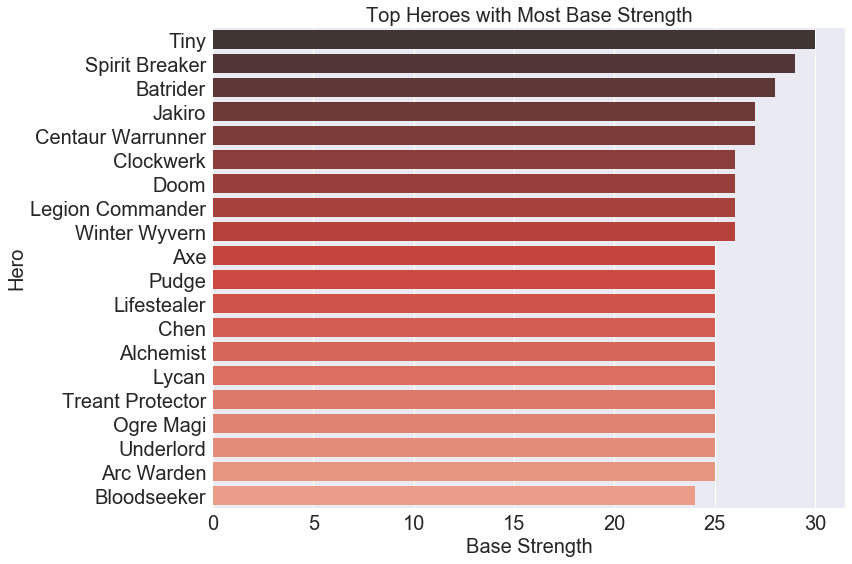

In [26]:
# Top heroes with base_strength
most_strength = df.nlargest(20, 'base_str')
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
ax = sns.barplot(y='name', x='base_str', data=most_strength, palette='Reds_d')
plt.title('Top Heroes with Most Base Strength', fontsize=20)
plt.xlabel('Base Strength', fontsize=20)
plt.ylabel('Hero', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

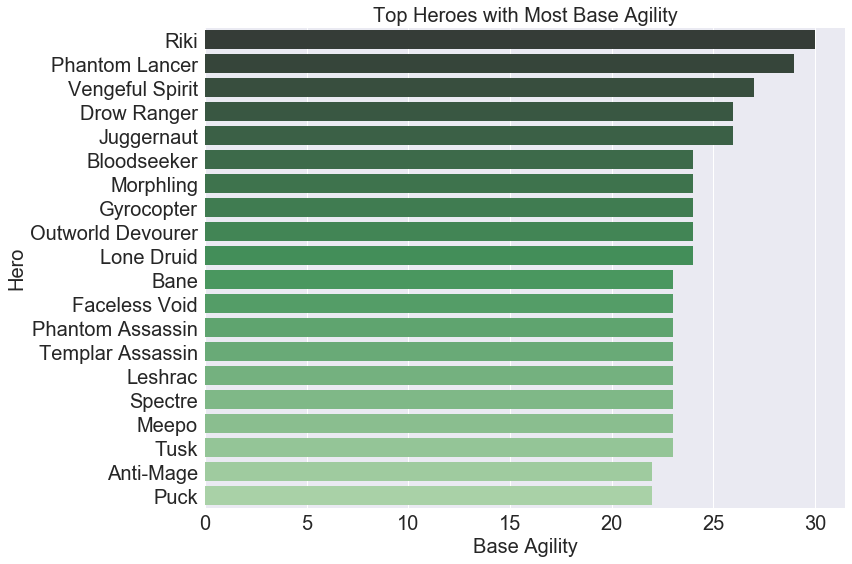

In [27]:
# Top heroes with base_agility
most_agility = df.nlargest(20, 'base_agi')
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
ax = sns.barplot(y='name', x='base_agi', data=most_agility, palette='Greens_d')
plt.title('Top Heroes with Most Base Agility', fontsize=20)
plt.xlabel('Base Agility', fontsize=20)
plt.ylabel('Hero', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

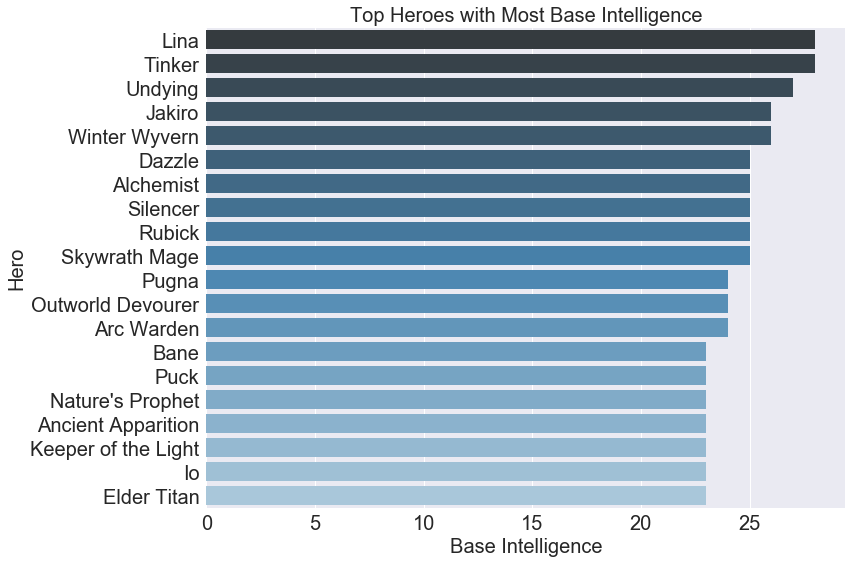

In [25]:
# Top heroes with base_intelligence
most_intelligence = df.nlargest(20, 'base_int')
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
ax = sns.barplot(y='name', x='base_int', data=most_intelligence, palette='Blues_d')
plt.title('Top Heroes with Most Base Intelligence', fontsize=20)
plt.xlabel('Base Intelligence', fontsize=20)
plt.ylabel('Hero', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

In [10]:
# Get roles
all_roles = set()
for index, row in df.iterrows():
    roles = set(row['roles'])
    all_roles = all_roles.union(roles)
all_roles = sorted(all_roles)
print(all_roles)

['Carry', 'Disabler', 'Durable', 'Escape', 'Initiator', 'Jungler', 'Nuker', 'Pusher', 'Support']


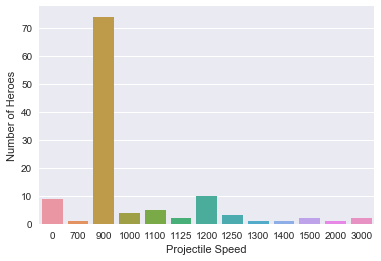

In [17]:
# Projectile speed
proj_speed = df['projectile_speed'].value_counts()
sns.barplot(y = proj_speed.values, x = proj_speed.index)
plt.xlabel('Projectile Speed')
plt.ylabel('Number of Heroes')
plt.show()

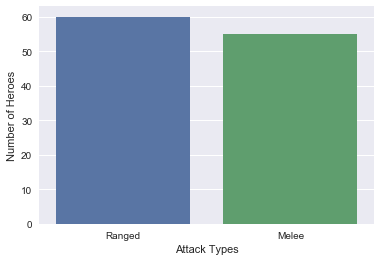

In [28]:
# Attack Type
attack_types = df['attack_type'].value_counts()
sns.barplot(y = attack_types.values, x = attack_types.index)
plt.xlabel('Attack Types')
plt.ylabel('Number of Heroes')
plt.show()

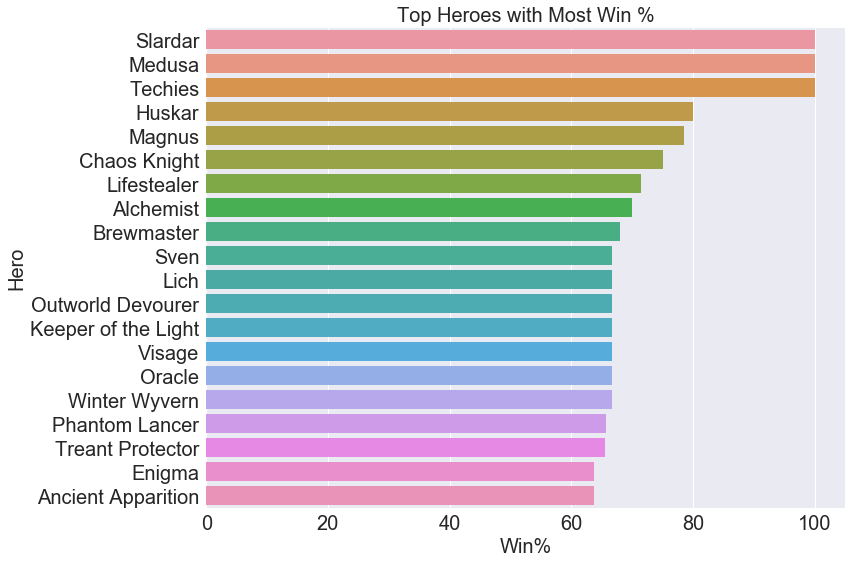

In [29]:
# Best heroes that were picked by pros and won
df['pro_win_%'] = df['pro_win'] / df['pro_pick'] * 100
most_win_cent = df.nlargest(20, 'pro_win_%')
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
ax = sns.barplot(y='name', x='pro_win_%', data=most_win_cent)
plt.title('Top Heroes with Most Win %', fontsize=20)
plt.xlabel('Win%', fontsize=20)
plt.ylabel('Hero', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()